In [44]:
import os
os.environ["OMP_NUM_THREADS"] = "1"

In [45]:
import pandas as pd
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from yellowbrick.cluster import SilhouetteVisualizer
from sklearn.preprocessing import StandardScaler

In [46]:
stunting_data = pd.read_excel("./stunting-data.xlsx")

stunting_data 

,PUSKESMAS,Desa/Kelurahan,JUMLAH BALITA,STUNTING,persent
0,WONOTUNGGAL,SILURAH,113,11,9.734513
1,WONOTUNGGAL,SODONG,100,7,7.000000
2,WONOTUNGGAL,GRINGGINGSARI,122,22,18.032787
3,WONOTUNGGAL,KEDUNGMALANG,152,9,5.921053
4,WONOTUNGGAL,SENDANG,156,11,7.051282
...,...,...,...,...,...
243,WARUNGASEM,CANDIARENG,184,17,9.239130
244,WARUNGASEM,LEBO,159,5,3.144654
245,WARUNGASEM,MENGUNENG,119,4,3.361345
246,WARUNGASEM,TERBAN,154,4,2.597403


In [47]:
stunting_data.columns = stunting_data.columns.str.lower().str.replace('/', '_')

In [48]:
stunting_data.columns = stunting_data.columns.str.lower().str.replace(' ', '_')

In [49]:
stunting_data_fix = stunting_data.drop(columns=["desa_kelurahan", "persent"])

In [50]:
stunting_data_fix

,puskesmas,jumlah_balita,stunting
0,WONOTUNGGAL,113,11
1,WONOTUNGGAL,100,7
2,WONOTUNGGAL,122,22
3,WONOTUNGGAL,152,9
4,WONOTUNGGAL,156,11
...,...,...,...
243,WARUNGASEM,184,17
244,WARUNGASEM,159,5
245,WARUNGASEM,119,4
246,WARUNGASEM,154,4


In [51]:
stunting_data_fix.columns[1:4]

Index(['jumlah_balita', 'stunting'], dtype='object')

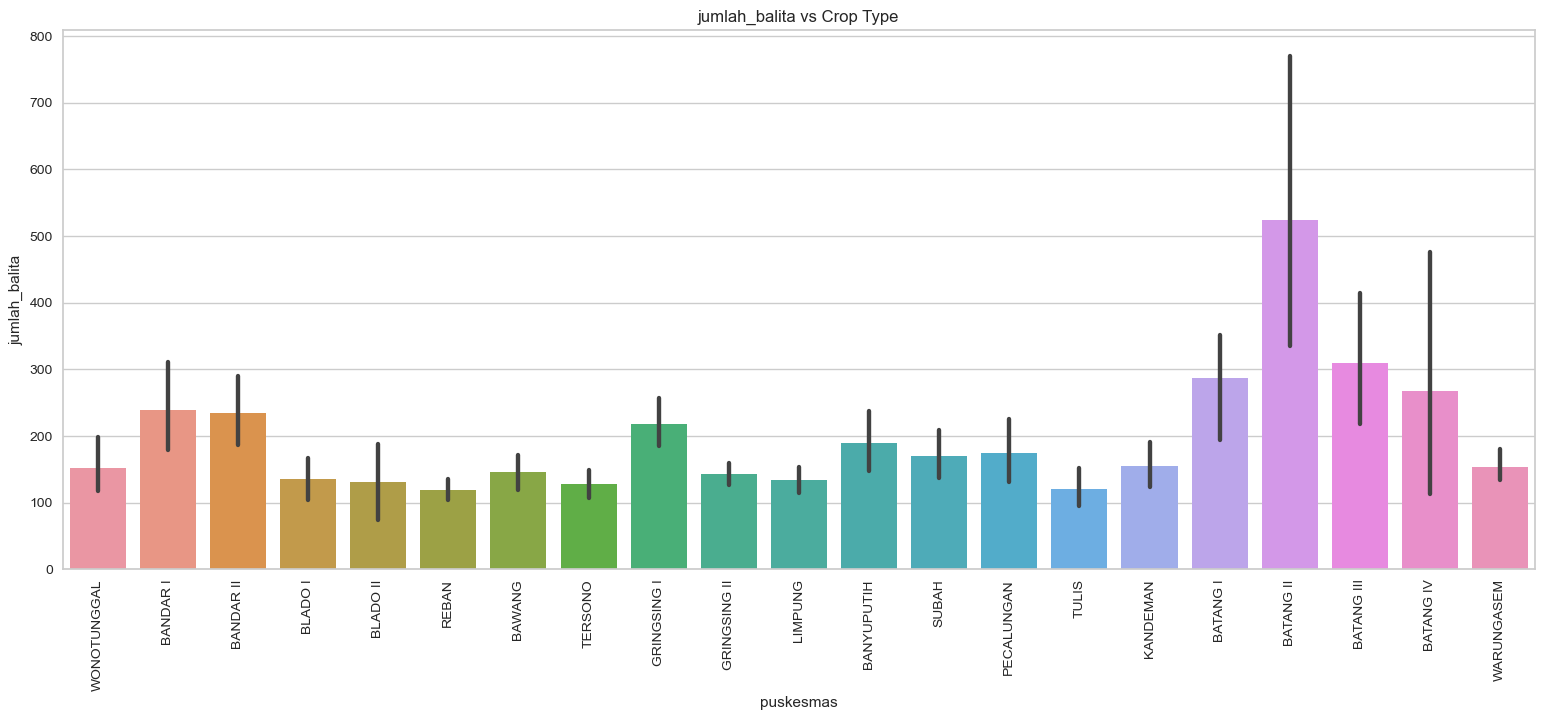

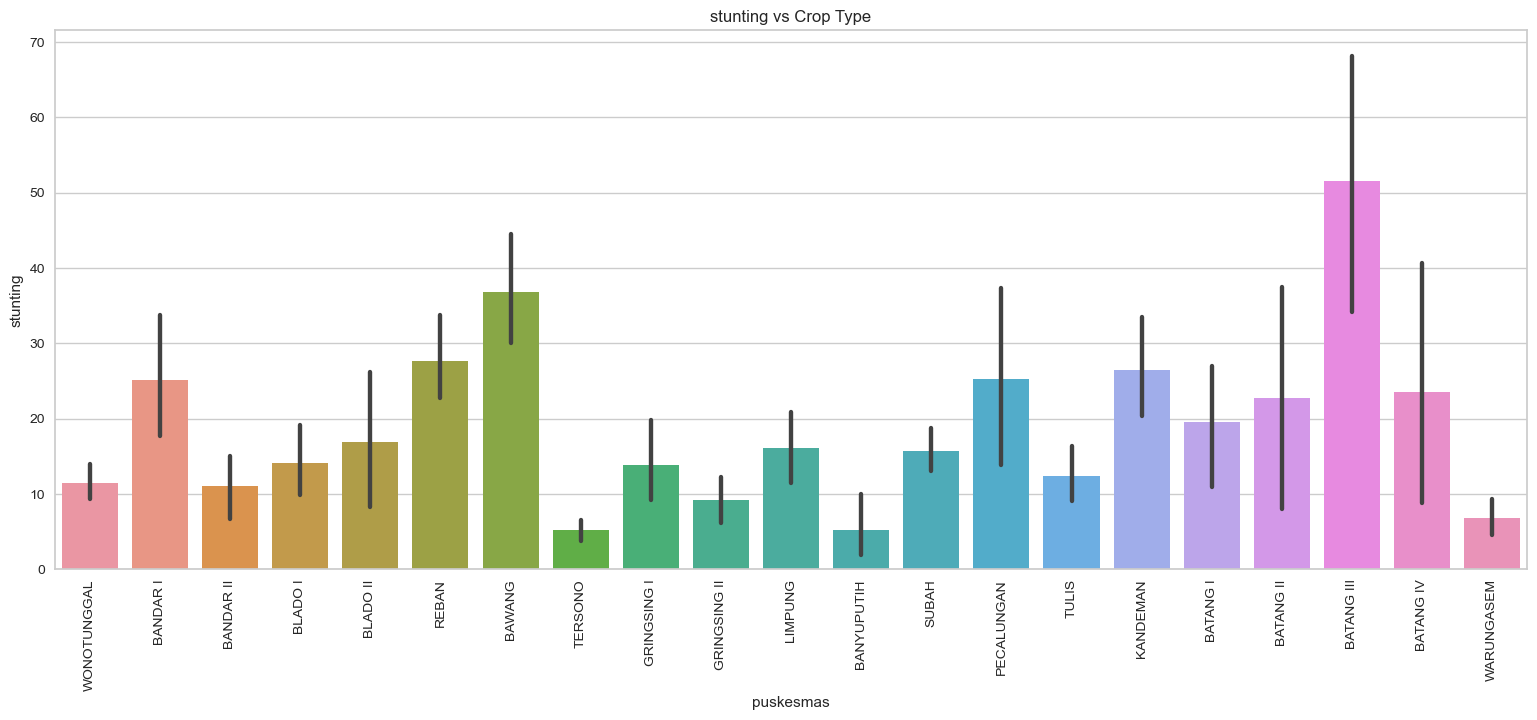

In [52]:
for column in stunting_data_fix.columns[1:4]:
    
    plt.figure(figsize=[19, 7])
    sns.barplot(x=stunting_data_fix.iloc[:, 0], y=column, data = stunting_data_fix)
    
    plt.xticks(rotation=90)
    plt.title(f"{column} vs Crop Type")
    plt.show()

In [53]:
stunting_data_corr = stunting_data_fix.copy()

In [54]:
stunting_data_corr

,puskesmas,jumlah_balita,stunting
0,WONOTUNGGAL,113,11
1,WONOTUNGGAL,100,7
2,WONOTUNGGAL,122,22
3,WONOTUNGGAL,152,9
4,WONOTUNGGAL,156,11
...,...,...,...
243,WARUNGASEM,184,17
244,WARUNGASEM,159,5
245,WARUNGASEM,119,4
246,WARUNGASEM,154,4


In [55]:
stunting_new_data = stunting_data_corr.drop(columns=["puskesmas"])

stunting_new_data

,jumlah_balita,stunting
0,113,11
1,100,7
2,122,22
3,152,9
4,156,11
...,...,...
243,184,17
244,159,5
245,119,4
246,154,4


In [56]:
stunting_corr = stunting_new_data.corr()

stunting_corr

,jumlah_balita,stunting
jumlah_balita,1.000000,0.465708
stunting,0.465708,1.000000


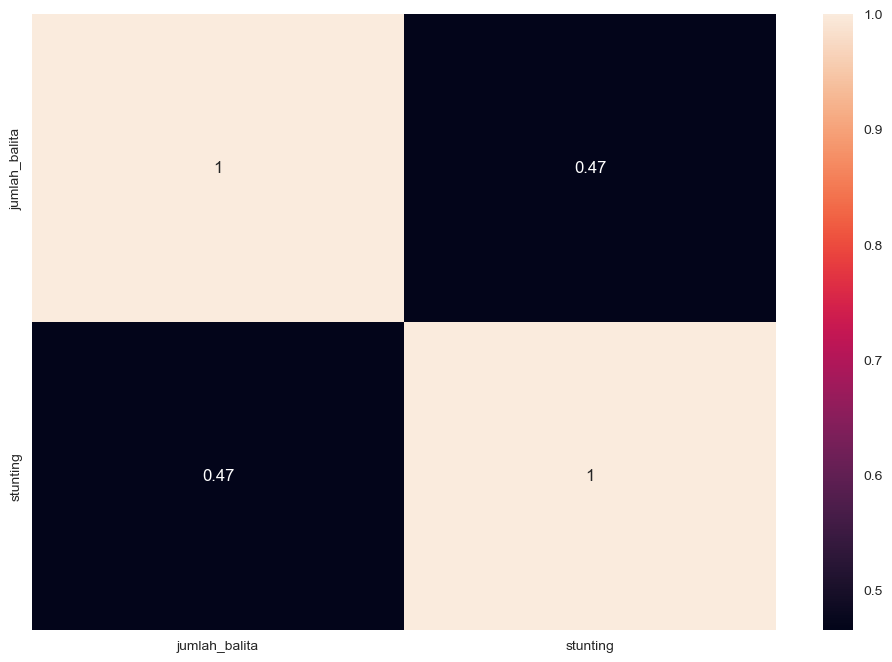

In [57]:
plt.figure(figsize=[12, 8])

sns.heatmap(stunting_corr, xticklabels=stunting_corr, 
            yticklabels=stunting_corr.columns, annot=True)

plt.show()

In [58]:
plt.figure(figsize=[12, 8])

fig = px.scatter(stunting_data_corr, x="jumlah_balita", y="stunting", color="puskesmas")

fig.show()

<Figure size 1200x800 with 0 Axes>

In [59]:
scaler = StandardScaler()

X_stunting = pd.DataFrame(data=scaler.fit_transform(stunting_new_data), 
                     columns=stunting_new_data.columns)

X_stunting.head()

,jumlah_balita,stunting
0,-0.556328,-0.470327
1,-0.683210,-0.733477
2,-0.468487,0.253335
3,-0.175683,-0.601902
4,-0.136642,-0.470327


In [60]:
X_stunting.describe()

,jumlah_balita,stunting
count,2.480000e+02,2.480000e+02
mean,7.162729e-18,3.939501e-17
std,1.002022e+00,1.002022e+00
min,-1.454262e+00,-1.193989e+00
25%,-6.661301e-01,-7.334768e-01
50%,-2.391236e-01,-2.729648e-01
75%,4.050461e-01,4.506970e-01
max,6.412417e+00,4.003218e+00


In [61]:
plt.figure(figsize=[12, 8])

fig = px.scatter(X_stunting, x="jumlah_balita", y="stunting")

fig.show()

<Figure size 1200x800 with 0 Axes>

In [62]:
!pip install threadpoolctl --upgrade

In [63]:
sum_of_sq_dist = []

for i in range(1, 21):
    model = KMeans(n_clusters=i)
    
    model.fit(X_stunting)
    
    sum_of_sq_dist.append(model.inertia_)
    print("Sum of square distances for {} clusters: {}".format(i, sum_of_sq_dist[i-1]))

Sum of square distances for 1 clusters: 496.0
Sum of square distances for 2 clusters: 266.6112001391165
Sum of square distances for 3 clusters: 194.81115986946034
Sum of square distances for 4 clusters: 133.3737128589772
Sum of square distances for 5 clusters: 101.95238999575751
Sum of square distances for 6 clusters: 85.6723923756127
Sum of square distances for 7 clusters: 73.49705410641468
Sum of square distances for 8 clusters: 64.62893452053733
Sum of square distances for 9 clusters: 57.407869431139794
Sum of square distances for 10 clusters: 50.652273456666386
Sum of square distances for 11 clusters: 43.31882433714973
Sum of square distances for 12 clusters: 39.216014771817306
Sum of square distances for 13 clusters: 34.261271524947745
Sum of square distances for 14 clusters: 31.772122393154007
Sum of square distances for 15 clusters: 29.858123118117025
Sum of square distances for 16 clusters: 27.04802753076646
Sum of square distances for 17 clusters: 25.572506972283115
Sum of squ

In [64]:
plt.figure(figsize=[12, 8])

fig = px.line(x=range(1, 21), y=sum_of_sq_dist)

fig.update_layout(
    xaxis = dict(tickvals = list(range(1, 21))),
    title="Sum of Squares (Distance) vs. Number of Clusters",
    xaxis_title="Number of Clusters",
    yaxis_title="Sum of Squares (Distance)")

fig.show()

<Figure size 1200x800 with 0 Axes>

In [65]:
silhouette_scores = []

for i in range(2, 21):
    
    model = KMeans(n_clusters = i)
    
    model.fit(X_stunting)
    
    silhouette_scores.append(silhouette_score(X_stunting, model.labels_))
    print("Silhouette Score for {} clusters: {}".format(i, silhouette_scores[i-2]))



Silhouette Score for 2 clusters: 0.5196135924140587
Silhouette Score for 3 clusters: 0.487900852437009
Silhouette Score for 4 clusters: 0.4594108587065218
Silhouette Score for 5 clusters: 0.4069847416911584
Silhouette Score for 6 clusters: 0.36752567759438765
Silhouette Score for 7 clusters: 0.3719712911595111
Silhouette Score for 8 clusters: 0.3903117910169822
Silhouette Score for 9 clusters: 0.3538218667497919
Silhouette Score for 10 clusters: 0.35556621536370747
Silhouette Score for 11 clusters: 0.37243150561349
Silhouette Score for 12 clusters: 0.3819939581951396
Silhouette Score for 13 clusters: 0.38188669007493564
Silhouette Score for 14 clusters: 0.3842636472489243
Silhouette Score for 15 clusters: 0.38290579109456535
Silhouette Score for 16 clusters: 0.38634414806292877
Silhouette Score for 17 clusters: 0.3642628119069774
Silhouette Score for 18 clusters: 0.361116884619734
Silhouette Score for 19 clusters: 0.364019719344189
Silhouette Score for 20 clusters: 0.3549712398042455


In [66]:
plt.figure(figsize=[12, 8])

fig = px.line(x=range(2, 21), y=silhouette_scores)

fig.update_layout(
    xaxis = dict(tickvals = list(range(2, 21))),
    title="Silhoette Score vs. Number of Clusters",
    xaxis_title="Number of Clusters",
    yaxis_title="Silhouette Score")

fig.show()

<Figure size 1200x800 with 0 Axes>

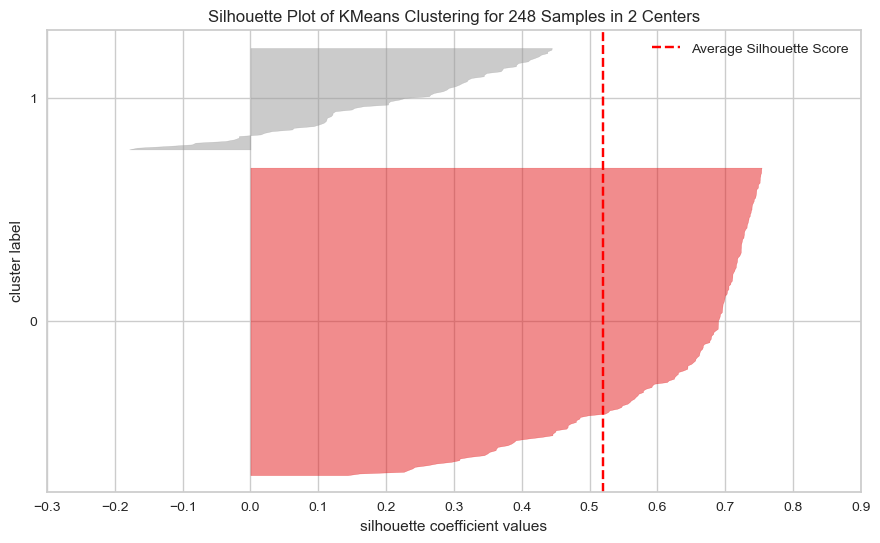

In [67]:
model = KMeans(n_clusters=2)
visualizer = SilhouetteVisualizer(model, size=(1050, 600))

visualizer.fit(X_stunting)
visualizer.show()

plt.show()

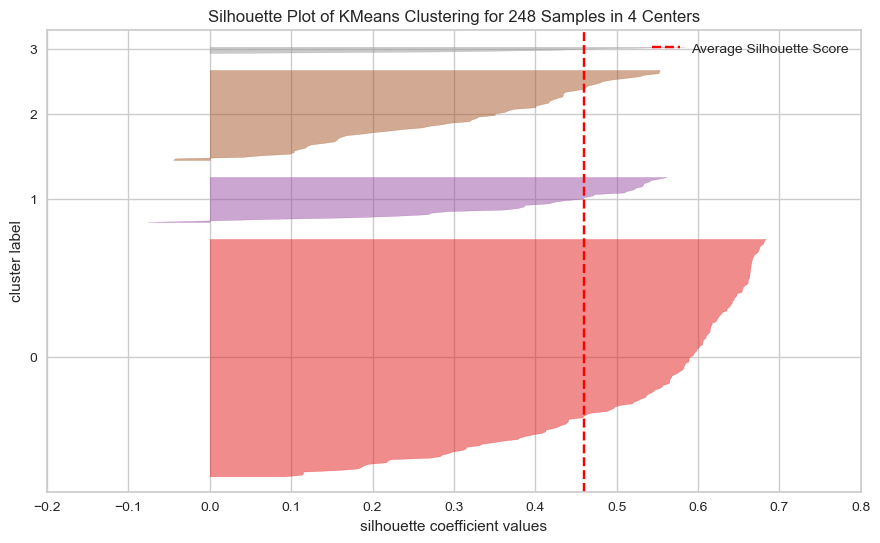

In [68]:
model = KMeans(n_clusters=4)
visualizer = SilhouetteVisualizer(model, size=(1050, 600))

visualizer.fit(X_stunting)
visualizer.show()

plt.show()

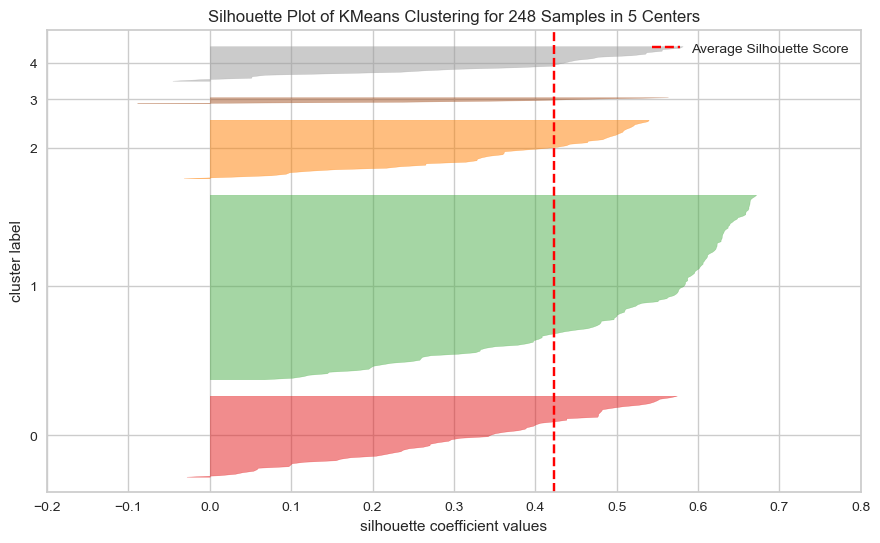

In [69]:
model = KMeans(n_clusters=5)
visualizer = SilhouetteVisualizer(model, size=(1050, 600))

visualizer.fit(X_stunting)
visualizer.show()

plt.show()

In [70]:
model = KMeans(n_clusters=5, random_state=111)

model.fit(X_stunting)

KMeans(n_clusters=5, random_state=111)

In [71]:
stunting_data_fix["Clusters"] = model.labels_

stunting_data_fix.head()

,puskesmas,jumlah_balita,stunting,Clusters
0,WONOTUNGGAL,113,11,2
1,WONOTUNGGAL,100,7,2
2,WONOTUNGGAL,122,22,1
3,WONOTUNGGAL,152,9,2
4,WONOTUNGGAL,156,11,2


In [72]:
stunting_data_fix["Clusters"].value_counts()

2    120
1     56
4     39
0     28
3      5
Name: Clusters, dtype: int64

In [73]:
centers = model.cluster_centers_

centers

array([[ 0.5012533 ,  1.99200246],
       [-0.21751186,  0.37786087],
       [-0.55055367, -0.68084685],
       [ 4.47990781,  2.31905996],
       [ 1.07211469, -0.17512706]])

In [74]:
plt.figure(figsize=[12, 8])

fig = px.scatter(stunting_data_fix, x="jumlah_balita", y="stunting", color="Clusters")

fig.show()

<Figure size 1200x800 with 0 Axes>

In [75]:
crop_label = stunting_data_fix['puskesmas']
cluster_pred = stunting_data_fix["Clusters"]

prediction_label_df = pd.concat([cluster_pred , crop_label], axis = 1)

prediction_label_df

,Clusters,puskesmas
0,2,WONOTUNGGAL
1,2,WONOTUNGGAL
2,1,WONOTUNGGAL
3,2,WONOTUNGGAL
4,2,WONOTUNGGAL
...,...,...
243,1,WARUNGASEM
244,2,WARUNGASEM
245,2,WARUNGASEM
246,2,WARUNGASEM


In [76]:
print("Stunting Cluster 1:", prediction_label_df[prediction_label_df["Clusters"] == 0]['puskesmas'].unique())
print("-------------------------------------")
print("Stunting Cluster 2:", prediction_label_df[prediction_label_df["Clusters"] == 1]['puskesmas'].unique())
print("-------------------------------------")
print("Stunting Cluster 3:", prediction_label_df[prediction_label_df["Clusters"] == 2]['puskesmas'].unique())
print("-------------------------------------")
print("Stunting Cluster 4:", prediction_label_df[prediction_label_df["Clusters"] == 3]['puskesmas'].unique())
print("-------------------------------------")
print("Stunting Cluster 5:", prediction_label_df[prediction_label_df["Clusters"] == 4]['puskesmas'].unique())

Stunting Cluster 1: ['BANDAR I' 'REBAN' 'BAWANG' 'GRINGSING I' 'PECALUNGAN' 'KANDEMAN'
 'BATANG III' 'BATANG IV']
-------------------------------------
Stunting Cluster 2: ['WONOTUNGGAL' 'BANDAR I' 'BLADO I' 'BLADO II' 'REBAN' 'BAWANG' 'LIMPUNG'
 'SUBAH' 'PECALUNGAN' 'TULIS' 'KANDEMAN' 'BATANG III' 'WARUNGASEM']
-------------------------------------
Stunting Cluster 3: ['WONOTUNGGAL' 'BANDAR I' 'BANDAR II' 'BLADO I' 'BLADO II' 'REBAN'
 'BAWANG' 'TERSONO' 'GRINGSING I' 'GRINGSING II' 'LIMPUNG' 'BANYUPUTIH'
 'SUBAH' 'PECALUNGAN' 'TULIS' 'KANDEMAN' 'BATANG I' 'BATANG IV'
 'WARUNGASEM']
-------------------------------------
Stunting Cluster 4: ['BANDAR I' 'BATANG II' 'BATANG III' 'BATANG IV']
-------------------------------------
Stunting Cluster 5: ['WONOTUNGGAL' 'BANDAR I' 'BANDAR II' 'BLADO I' 'BAWANG' 'TERSONO'
 'GRINGSING I' 'LIMPUNG' 'BANYUPUTIH' 'SUBAH' 'PECALUNGAN' 'TULIS'
 'BATANG I' 'BATANG II' 'BATANG IV' 'WARUNGASEM']


In [77]:
stunting_data_fix.columns[1:3]

Index(['jumlah_balita', 'stunting'], dtype='object')

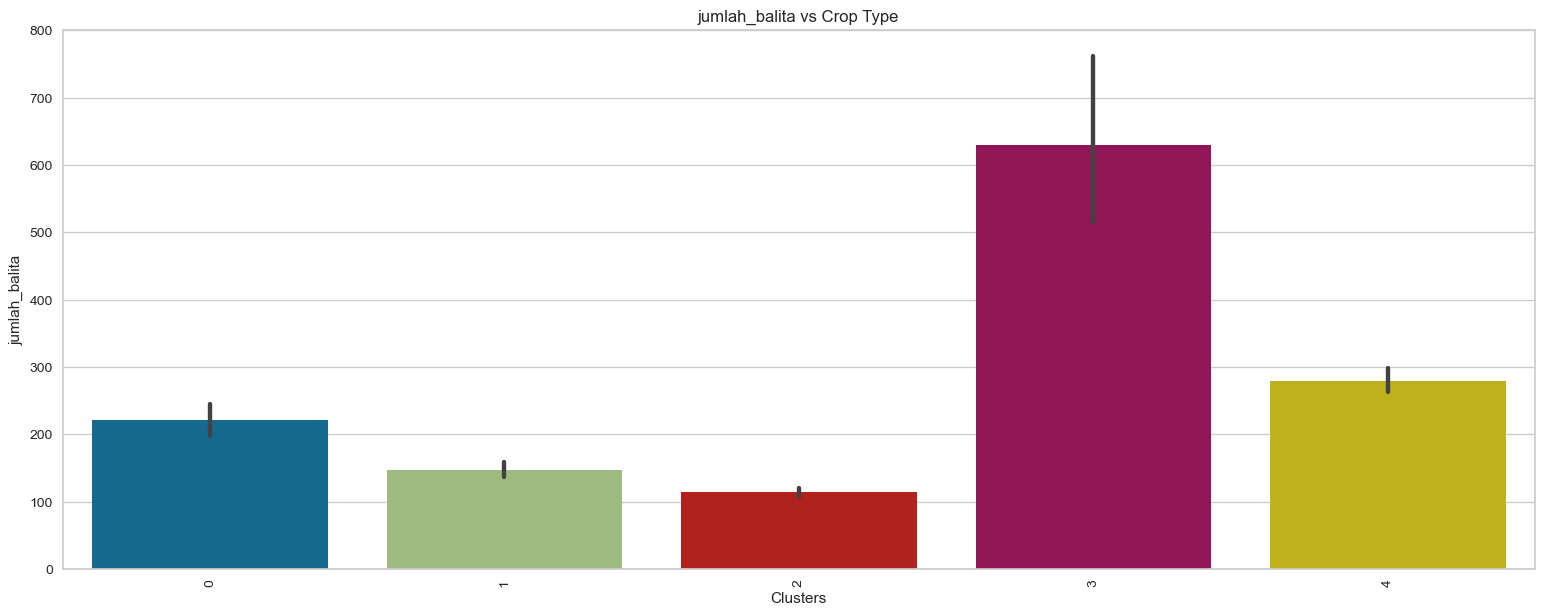

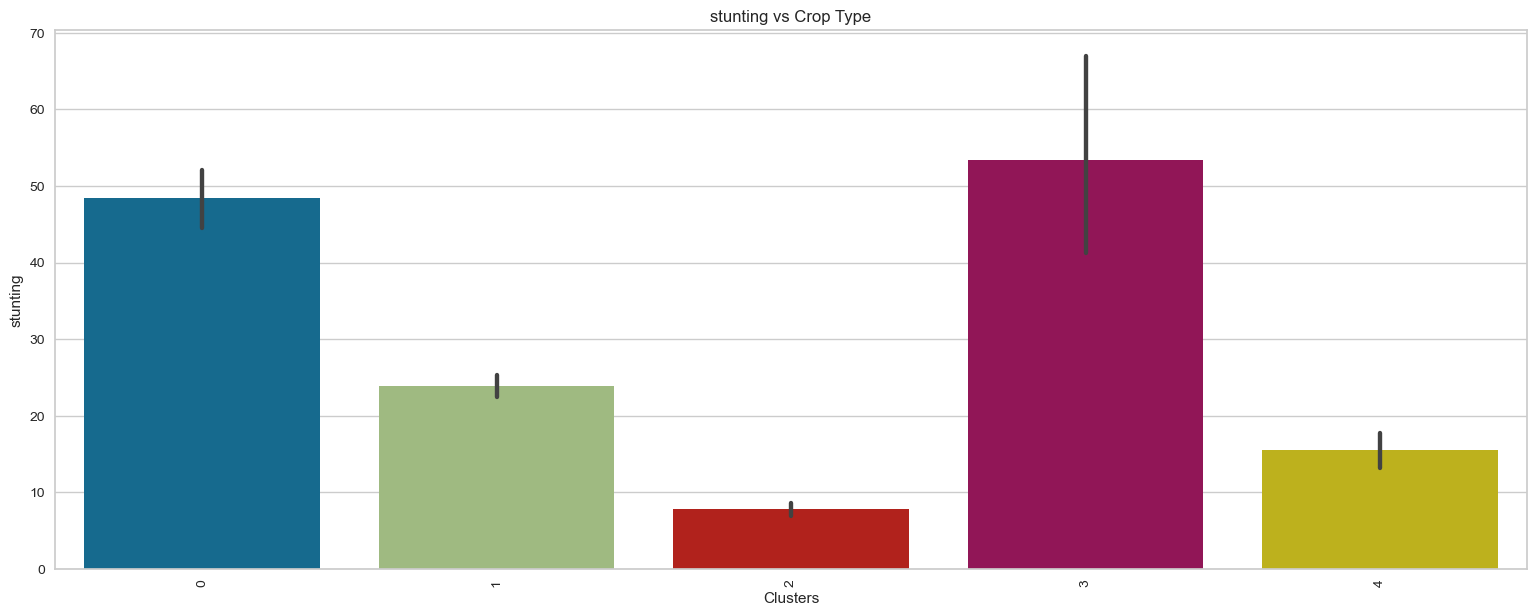

In [78]:
for column in stunting_data_fix.columns[1:3]:
    
    plt.figure(figsize=[19, 7])
    sns.barplot(x="Clusters", y=column, data = stunting_data_fix)
    plt.xticks(rotation=90)
    plt.title(f"{column} vs Crop Type")
    plt.show()

In [79]:
prediction_label_df.columns[1]

'puskesmas'

In [80]:
print(stunting_data_fix[prediction_label_df.Clusters == 0 ])
print("=====")
print(stunting_data_fix[prediction_label_df.Clusters == 1 ])
print("=====")
print(stunting_data_fix[prediction_label_df.Clusters == 2 ])
print("=====")
print(stunting_data_fix[prediction_label_df.Clusters == 3 ])
print("=====")
print(stunting_data_fix[prediction_label_df.Clusters == 4 ])
print("=====")
print(stunting_data_fix[prediction_label_df.Clusters == 5 ])
print("=====")

       puskesmas  jumlah_balita  stunting  Clusters
16      BANDAR I            240        44         0
17      BANDAR I            316        42         0
51         REBAN            158        61         0
54         REBAN            149        39         0
57         REBAN            196        45         0
58         REBAN            158        46         0
69        BAWANG             97        43         0
70        BAWANG            230        64         0
72        BAWANG            126        43         0
74        BAWANG            160        53         0
76        BAWANG            230        69         0
78        BAWANG            202        40         0
82        BAWANG            240        65         0
84        BAWANG            114        42         0
85        BAWANG            156        42         0
88        BAWANG            169        44         0
113  GRINGSING I            261        35         0
169   PECALUNGAN            297        44         0
171   PECALU